In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Cleaning
### Tolong baca perintah dan tagar komen dengan saksama :)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

# Scalling untuk MinMax Scaller
from sklearn.preprocessing import MinMaxScaler
# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# B. Outlier Handling

### Outlier Handling : InterQuartile Handling

In [ ]:
# untuk plot Q-Q
import scipy.stats as stats

In [ ]:
df_california = pd.read_csv('/content/drive/MyDrive/california_dataset.csv')
df_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
from sklearn.model_selection import train_test_split
# splitting terlebih dahulu (angka 42 anjuran dari buku yang di baca ka kurnia)
train_clfr, test_clfr = train_test_split(df_california, test_size = 0.2, train_size=0.8, random_state=42)

#NOTES :
#train : test = 80:20 atau 75:25 atau (minimum :70:30 atau maksimum: 90:10) bagi angka yg lain (85:15)
#data train di-handling outliernya
#tapi tidak untuk data test, karena data test ibarat representasi data masa depan yang digunakan untuk melihat performa Machine Learning

In [ ]:
train_clfr.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.880754,28.608285,5.435235,1.096685,1426.453004,3.096961,35.643149,-119.582290,2.071947
std,1.904294,12.602499,2.387375,0.433215,1137.056380,11.578744,2.136665,2.005654,1.156226
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.566700,18.000000,4.452055,1.006508,789.000000,2.428799,33.930000,-121.810000,1.198000
50%,3.545800,29.000000,5.235874,1.049286,1167.000000,2.817240,34.260000,-118.510000,1.798500
75%,4.773175,37.000000,6.061037,1.100348,1726.000000,3.280000,37.720000,-118.010000,2.651250
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Assignment 1.a :
1. lakukan looping untuk melihat plot distribusi data dan outlier pada kolom-kolom : ['MedInc', 'HouseAge', 'AveRooms','AveBedrms', 'AveOccup'] di california_dataset.csv
2. Daftar nama kolom yang Anda cek, kolom_kolom = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup']
3. Lakukan untuk tujuan machine learning dan juga exploratory data analysis.

In [ ]:
# Assignment 1.a : lakukan looping untuk melihat plot distribusi data dan outlier pada kolom-kolom : ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup'] di california_dataset.csv
# Daftar nama kolom yang ingin Anda cek


### untuk tujuan machine learning

In [ ]:
def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [ ]:
for col in train_clfr.columns:
  print(col)

MedInc
HouseAge
AveRooms
AveBedrms
Population
AveOccup
Latitude
Longitude
house_price


In [ ]:
# Copy dataframe asli dulu untuk perbandingan
train_clfr_trimmed = train_clfr.copy()

# Kolom yang ingin di-loop
columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

for col in columns:
    print(f"\n--- Kolom: {col} ---")

    # Data awal
    before_count = train_clfr_trimmed.shape[0]

    # Hitung IQR
    Q1 = train_clfr_trimmed[col].quantile(0.25)
    Q3 = train_clfr_trimmed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data
    train_clfr_trimmed = train_clfr_trimmed[(train_clfr_trimmed[col] >= lower_bound) & (train_clfr_trimmed[col] <= upper_bound)]

    # Data setelah outlier dibuang
    after_count = train_clfr_trimmed.shape[0]

    print(f"Jumlah data sebelum  : {before_count}")
    print(f"Jumlah data sesudah  : {after_count}")
    print(f"Outlier terhapus     : {before_count - after_count}")

print(f"\nTotal data akhir setelah semua kolom diproses: {train_clfr_trimmed.shape[0]}")



--- Kolom: MedInc ---
Jumlah data sebelum  : 16512
Jumlah data sesudah  : 15983
Outlier terhapus     : 529

--- Kolom: HouseAge ---
Jumlah data sebelum  : 15983
Jumlah data sesudah  : 15983
Outlier terhapus     : 0

--- Kolom: AveRooms ---
Jumlah data sebelum  : 15983
Jumlah data sesudah  : 15632
Outlier terhapus     : 351

--- Kolom: AveBedrms ---
Jumlah data sebelum  : 15632
Jumlah data sesudah  : 14733
Outlier terhapus     : 899

--- Kolom: Population ---
Jumlah data sebelum  : 14733
Jumlah data sesudah  : 13886
Outlier terhapus     : 847

--- Kolom: AveOccup ---
Jumlah data sebelum  : 13886
Jumlah data sesudah  : 13448
Outlier terhapus     : 438

Total data akhir setelah semua kolom diproses: 13448



> **Kolom MedInc**
---



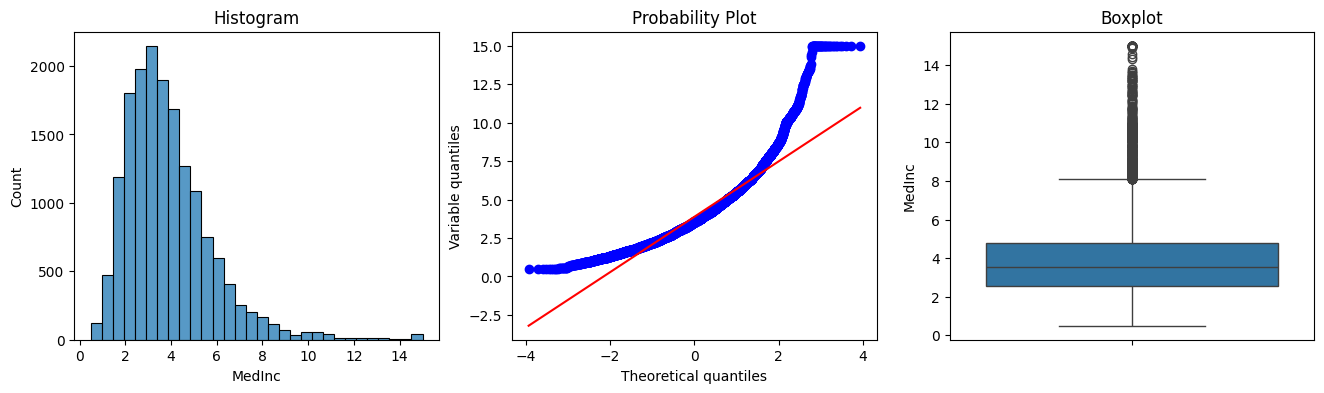

In [ ]:
#memvisualisasikan outlier di MedInc Sebelum Trimmed
check_plot(train_clfr.copy(), 'MedInc')

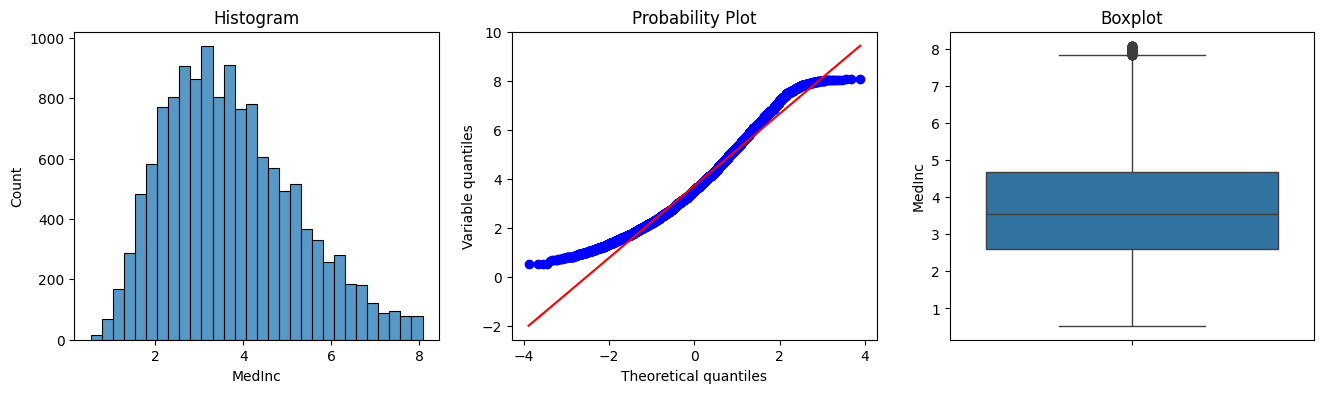

In [ ]:
#memvisualisasikan outlier di MedInc Sesudah Trimmed
check_plot(train_clfr_trimmed, 'MedInc')

> **Kolom HouseAge**


---



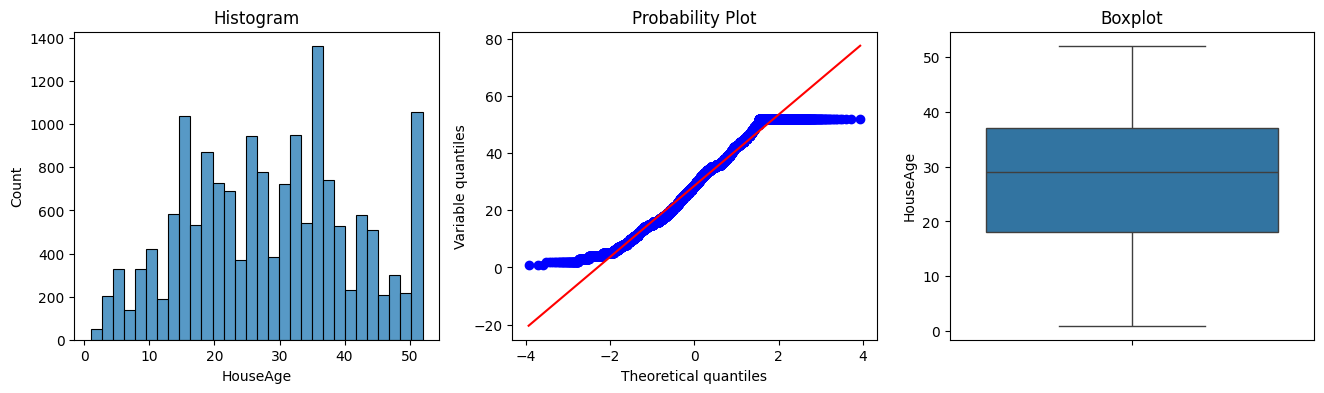

In [ ]:
#memvisualisasikan outlier di MedInc Sebelum Trimmed
check_plot(train_clfr.copy(), 'HouseAge')

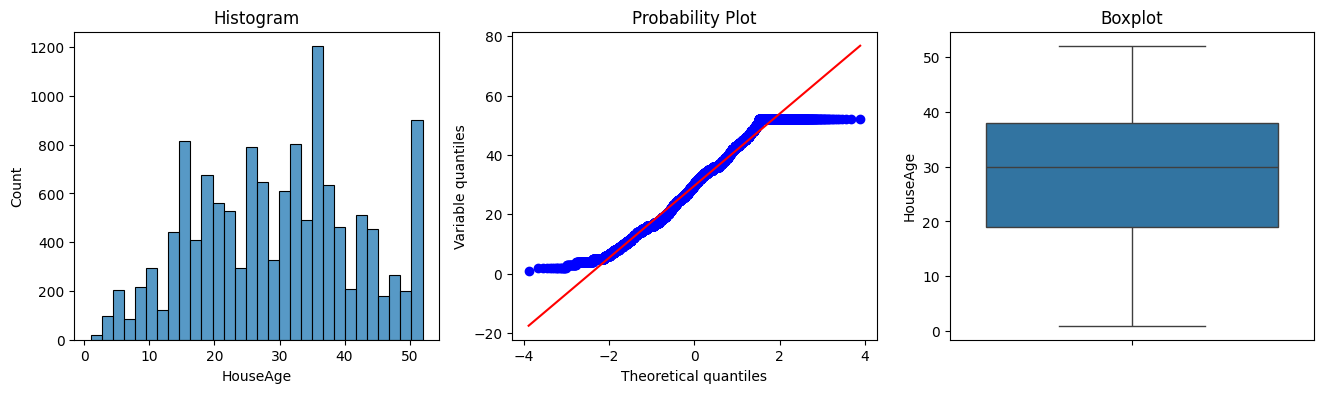

In [ ]:
#memvisualisasikan outlier di MedInc Sesudah Trimmed
check_plot(train_clfr_trimmed, 'HouseAge')

> **Kolom AveRooms**


---



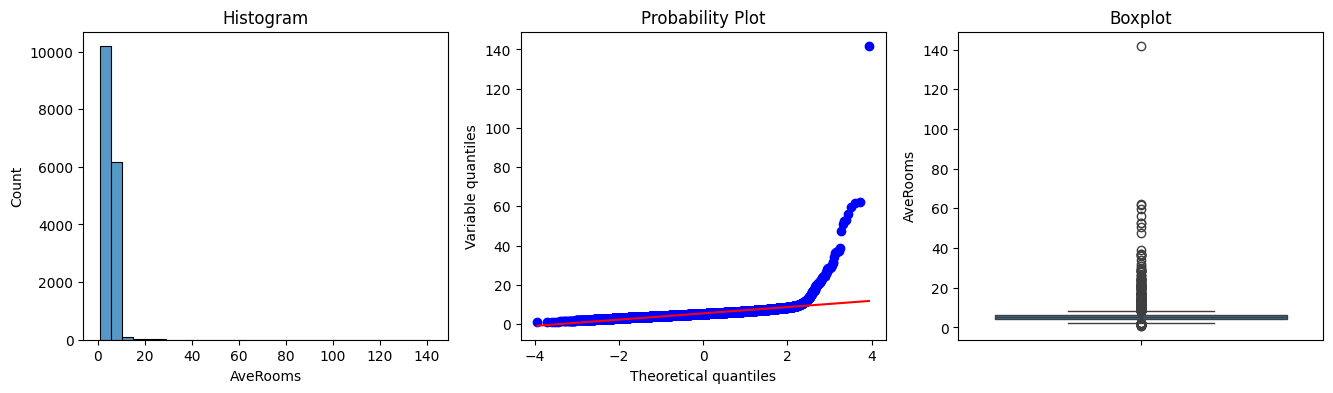

In [ ]:
#memvisualisasikan outlier di MedInc Sebelum Trimmed
check_plot(train_clfr.copy(), 'AveRooms')

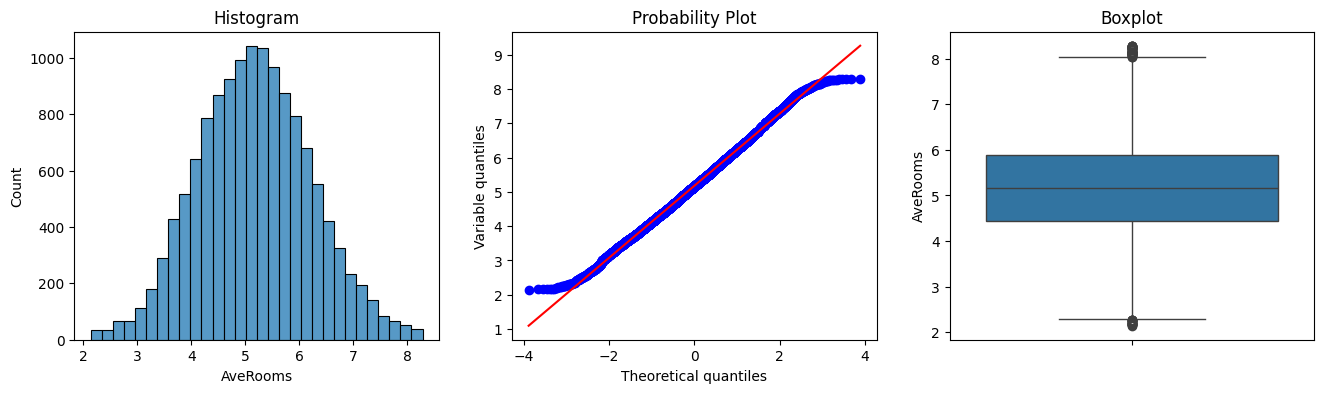

In [ ]:
#memvisualisasikan outlier di MedInc Sesudah Trimmed
check_plot(train_clfr_trimmed, 'AveRooms')

> **Kolom AveBedrms**


---



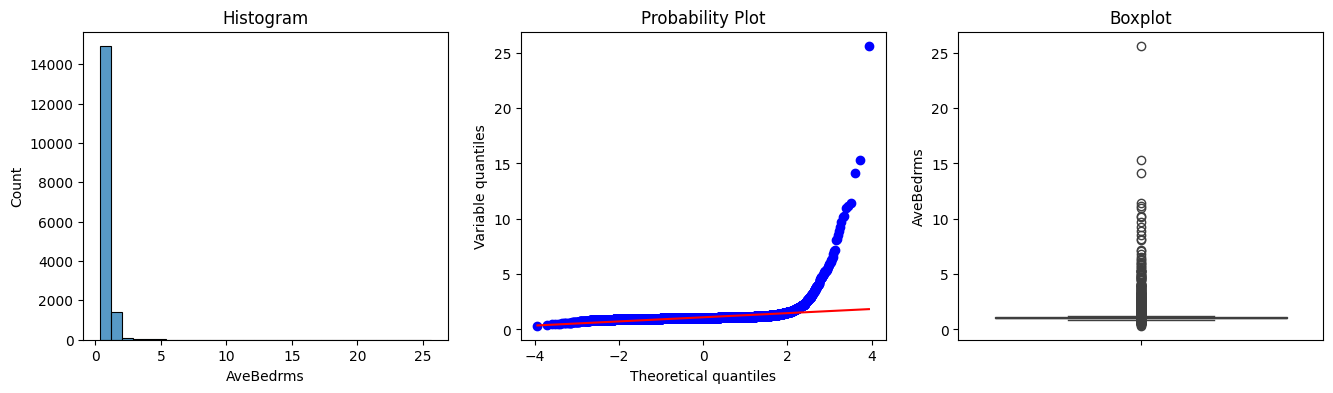

In [ ]:
#memvisualisasikan outlier di MedInc Sebelum Trimmed
check_plot(train_clfr.copy(), 'AveBedrms')

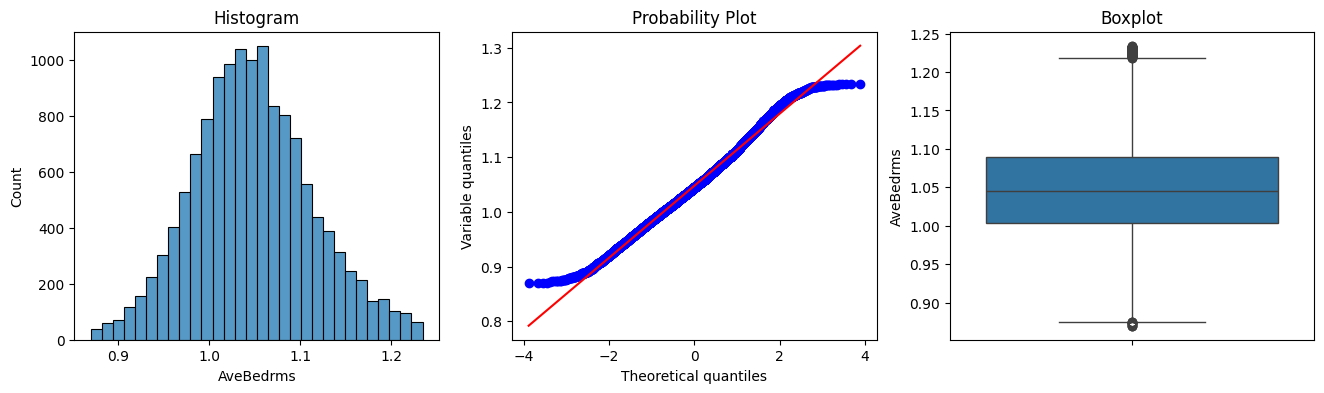

In [ ]:
#memvisualisasikan outlier di MedInc Sesudah Trimmed
check_plot(train_clfr_trimmed, 'AveBedrms')

> **Kolom Population**


---



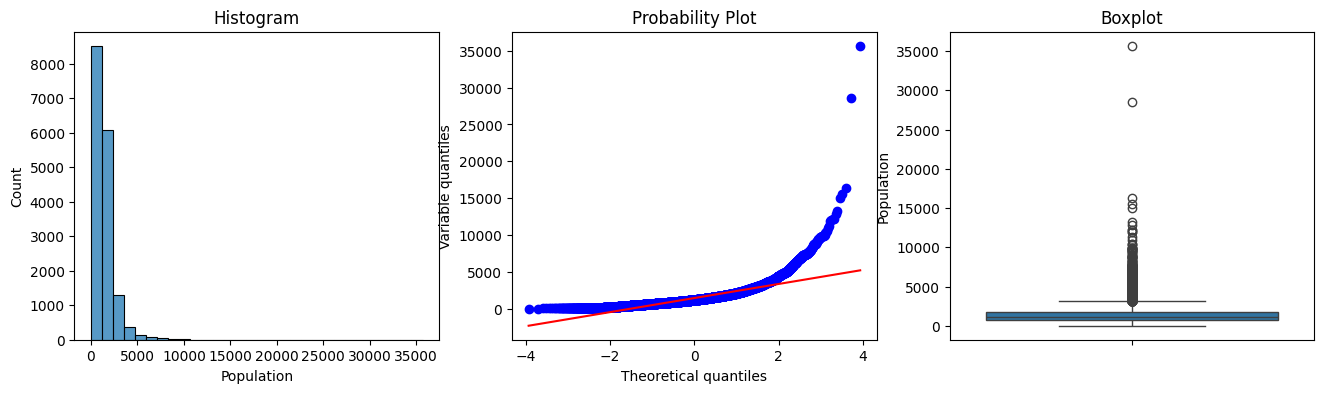

In [ ]:
#memvisualisasikan outlier di MedInc Sebelum Trimmed
check_plot(train_clfr.copy(), 'Population')

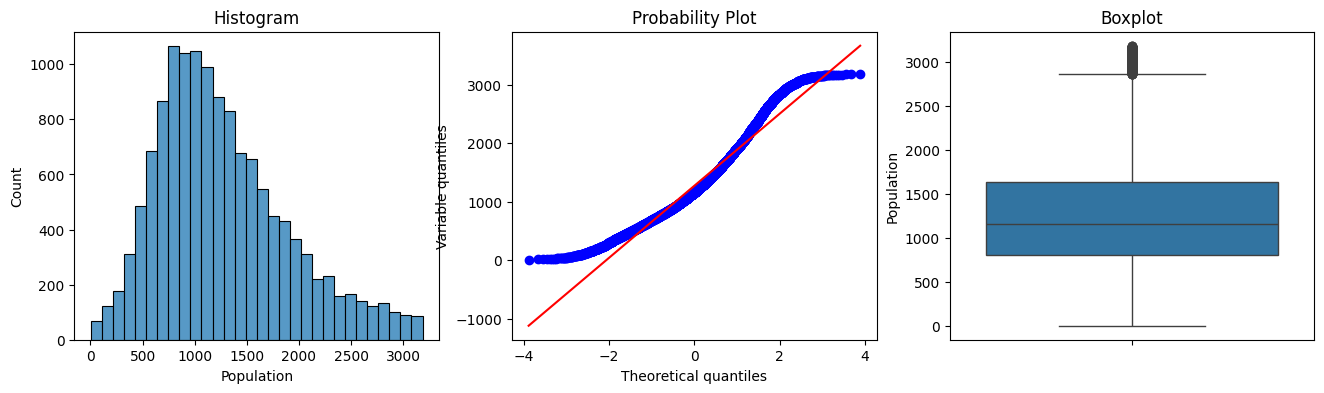

In [ ]:
#memvisualisasikan outlier di MedInc Sesudah Trimmed
check_plot(train_clfr_trimmed, 'Population')

>**Kolom AveOccup**


---



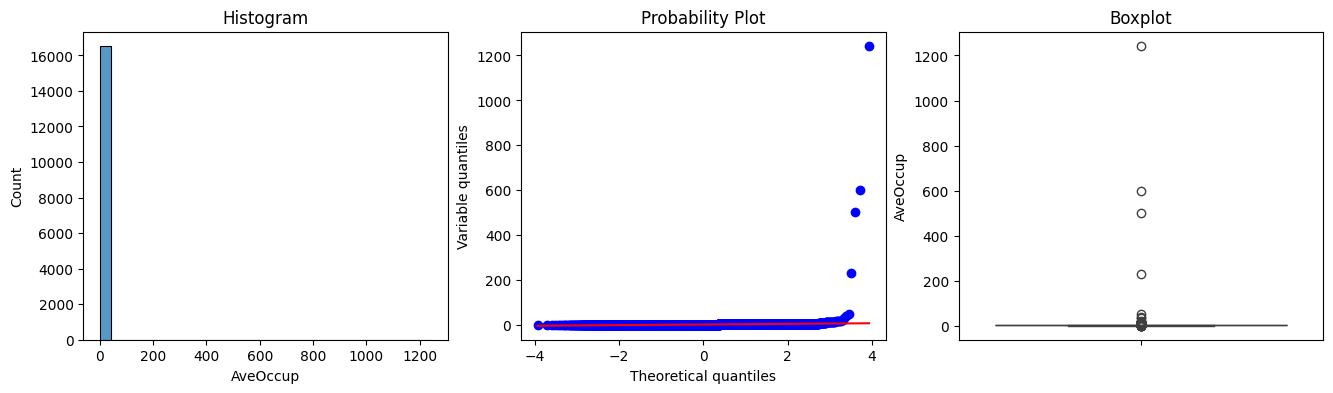

In [ ]:
#memvisualisasikan outlier di MedInc Sebelum Trimmed
check_plot(train_clfr.copy(), 'AveOccup')

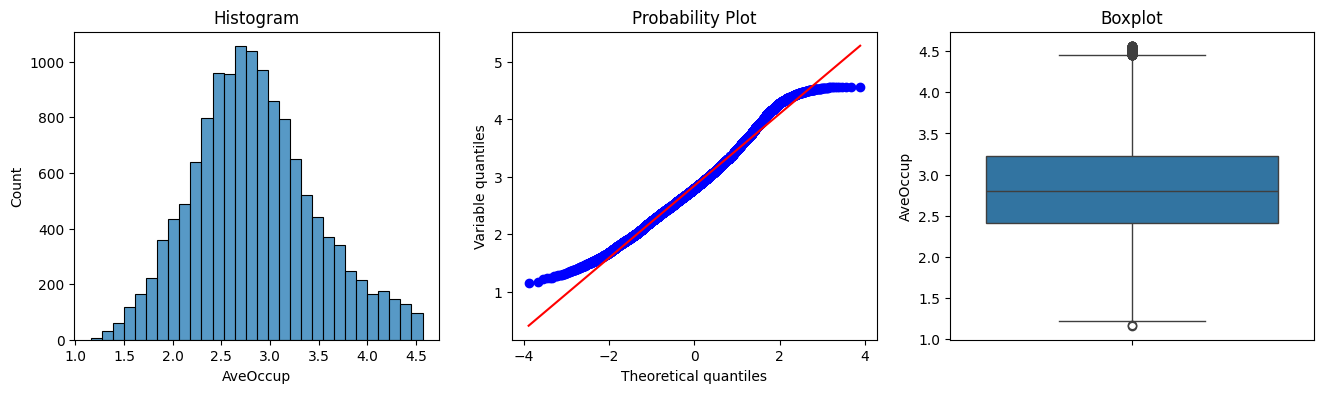

In [ ]:
#memvisualisasikan outlier di MedInc Sesudah Trimmed
check_plot(train_clfr_trimmed, 'AveOccup')

### untuk exploratory data analysis

In [ ]:
# copy data for backup
clfr_trimmed = df_california.copy()

In [ ]:
# Kolom yang ingin di-loop
columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

for col in columns:
    print(f"\n--- Kolom: {col} ---")

    # Data awal
    before_count = clfr_trimmed.shape[0]

    # Hitung IQR
    Q1 = clfr_trimmed[col].quantile(0.25)
    Q3 = clfr_trimmed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data
    clfr_trimmed = clfr_trimmed[(clfr_trimmed[col] >= lower_bound) & (clfr_trimmed[col] <= upper_bound)]

    # Data setelah outlier dibuang
    after_count = clfr_trimmed.shape[0]

    print(f"Jumlah data sebelum  : {before_count}")
    print(f"Jumlah data sesudah  : {after_count}")
    print(f"Outlier terhapus     : {before_count - after_count}")

print(f"\nTotal data akhir setelah semua kolom diproses: {clfr_trimmed.shape[0]}")



--- Kolom: MedInc ---
Jumlah data sebelum  : 20640
Jumlah data sesudah  : 19959
Outlier terhapus     : 681

--- Kolom: HouseAge ---
Jumlah data sebelum  : 19959
Jumlah data sesudah  : 19959
Outlier terhapus     : 0

--- Kolom: AveRooms ---
Jumlah data sebelum  : 19959
Jumlah data sesudah  : 19520
Outlier terhapus     : 439

--- Kolom: AveBedrms ---
Jumlah data sebelum  : 19520
Jumlah data sesudah  : 18404
Outlier terhapus     : 1116

--- Kolom: Population ---
Jumlah data sebelum  : 18404
Jumlah data sesudah  : 17341
Outlier terhapus     : 1063

--- Kolom: AveOccup ---
Jumlah data sebelum  : 17341
Jumlah data sesudah  : 16813
Outlier terhapus     : 528

Total data akhir setelah semua kolom diproses: 16813


> **Kolom MedInc**


---



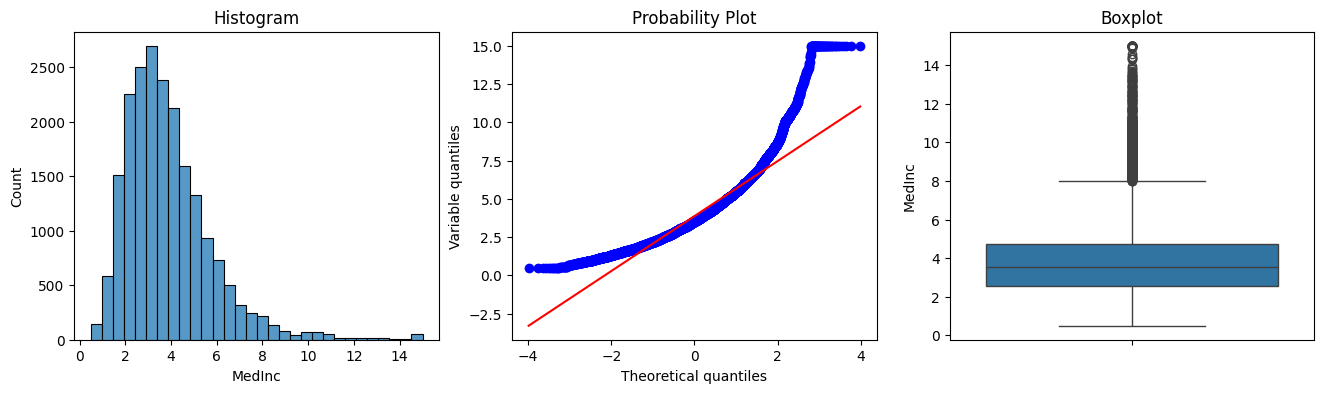

In [ ]:
# memvisualisasikan outlier di MedInc sebelum Trimmed
check_plot(df_california.copy(), 'MedInc')

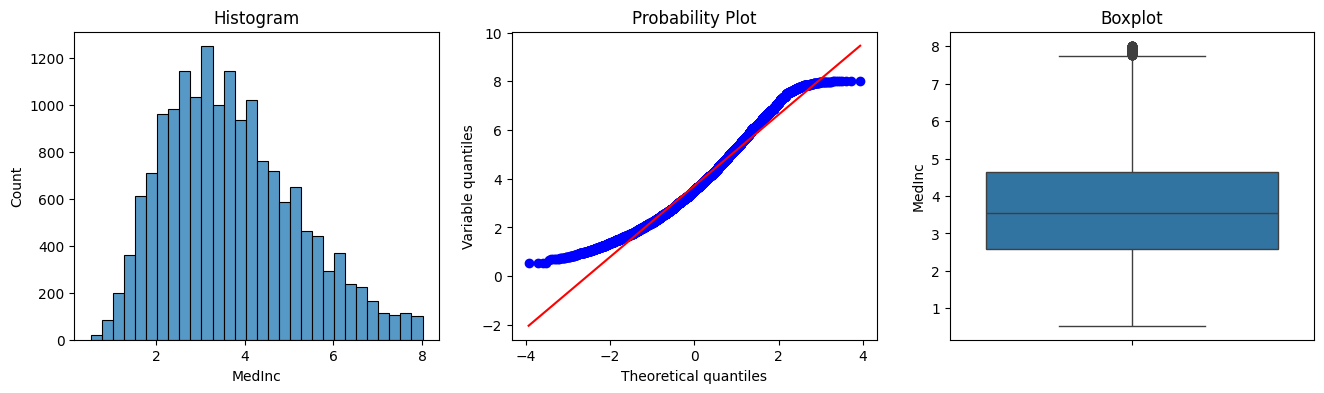

In [ ]:
# memvisualisasikan outlier di MedInc sesudah Trimmed
check_plot(clfr_trimmed, 'MedInc')

> **Kolom 'HouseAge'**


---



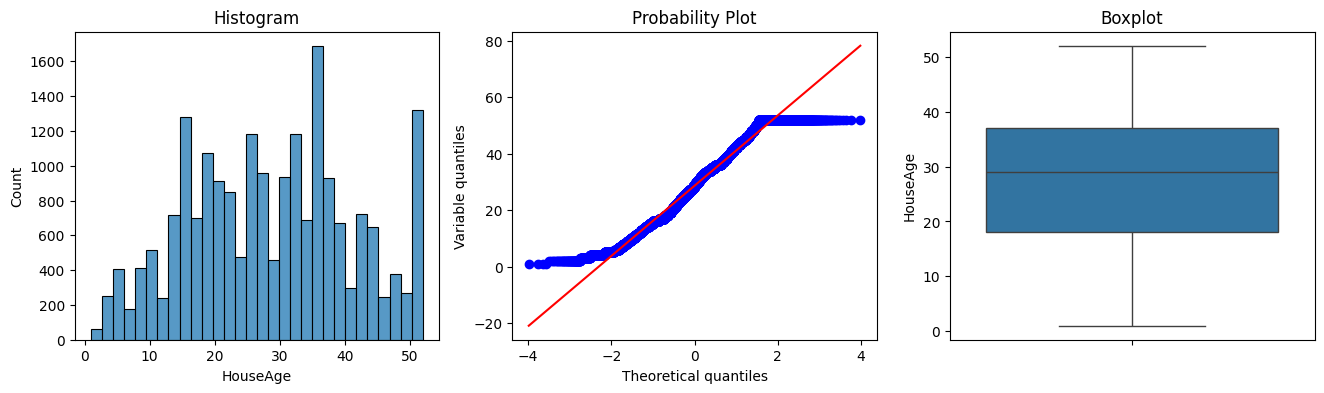

In [ ]:
# memvisualisasikan outlier di MedInc sebelum Trimmed
check_plot(df_california.copy(), 'HouseAge')

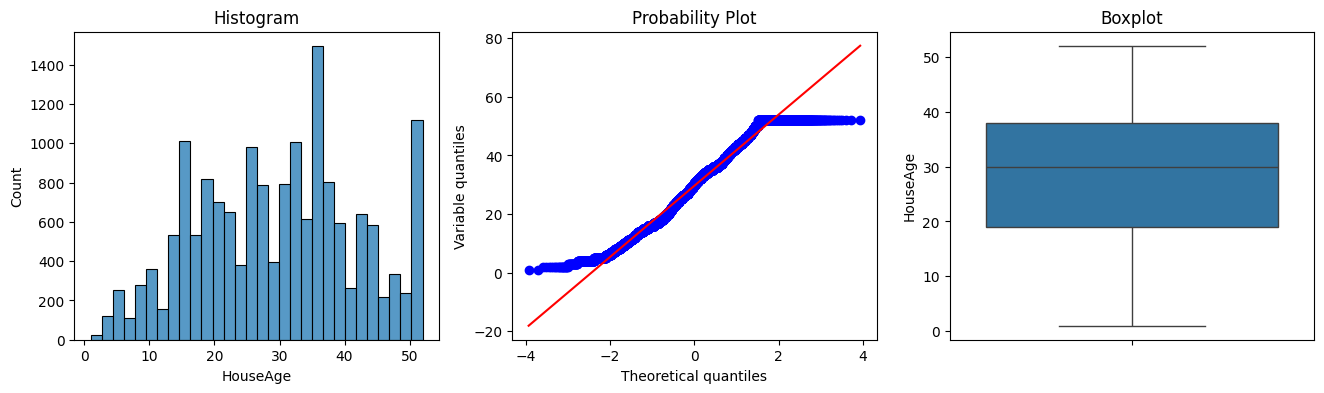

In [ ]:
# memvisualisasikan outlier di MedInc sesudah Trimmed
check_plot(clfr_trimmed, 'HouseAge')

> **Kolom 'AveRooms'**


---



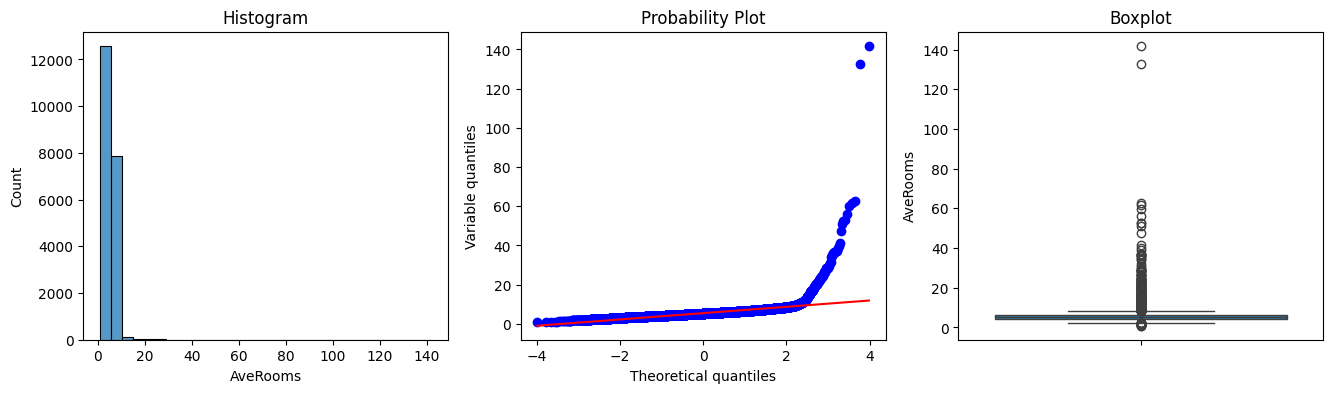

In [ ]:
# memvisualisasikan outlier di MedInc sebelum Trimmed
check_plot(df_california.copy(), 'AveRooms')

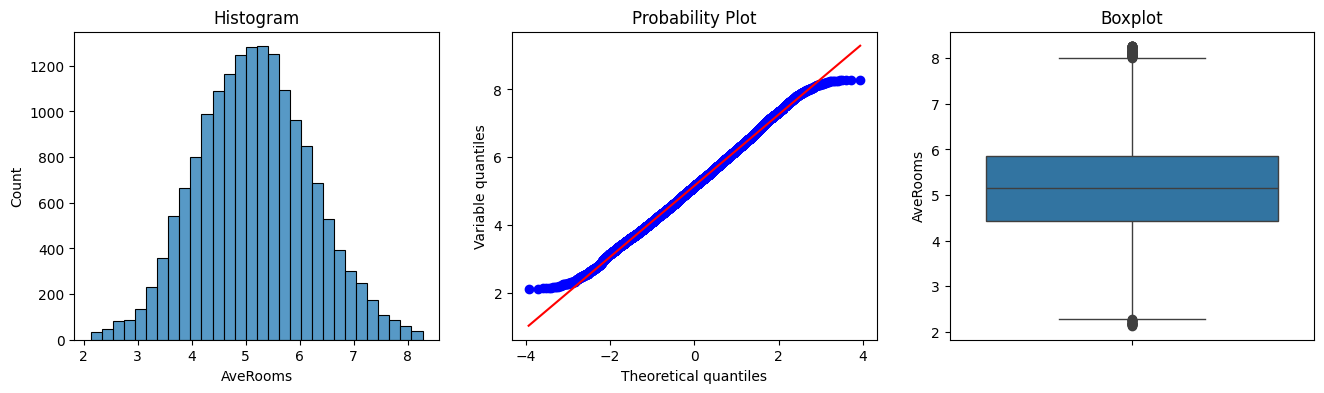

In [ ]:
# memvisualisasikan outlier di MedInc sesudah Trimmed
check_plot(clfr_trimmed, 'AveRooms')

> **Kolom 'AveBedrms'**


---



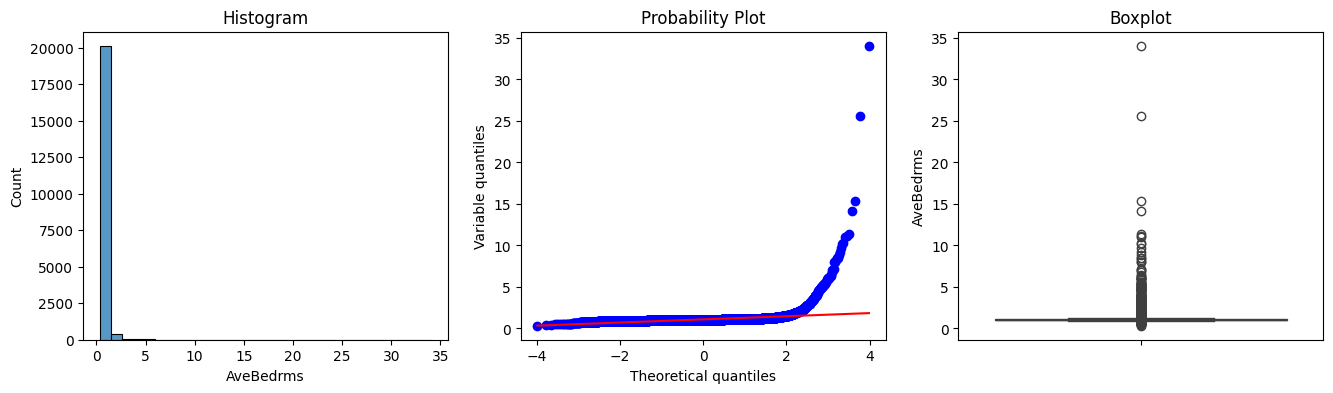

In [ ]:
# memvisualisasikan outlier di MedInc sebelum Trimmed
check_plot(df_california.copy(), 'AveBedrms')

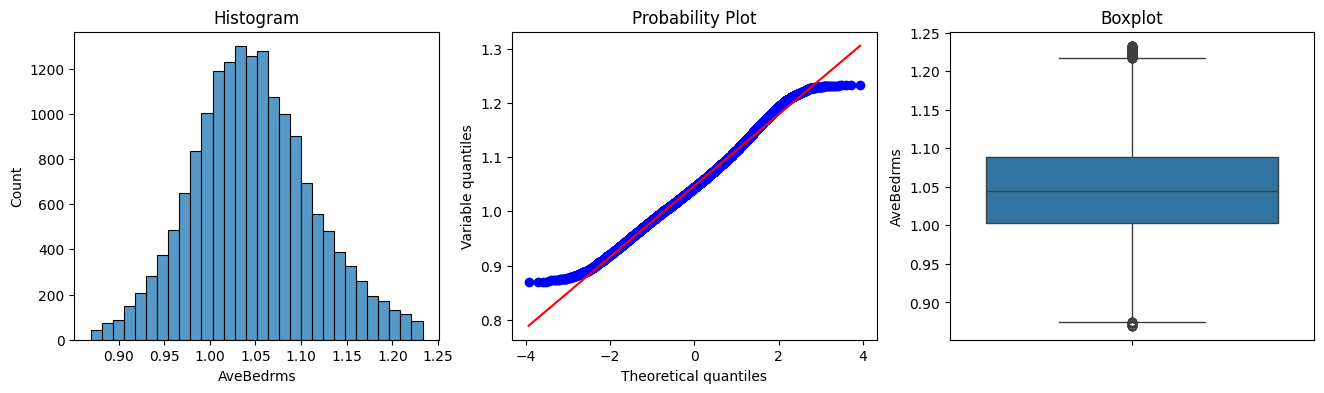

In [ ]:
# memvisualisasikan outlier di MedInc sesudah Trimmed
check_plot(clfr_trimmed, 'AveBedrms')

> **Kolom 'Population'**


---



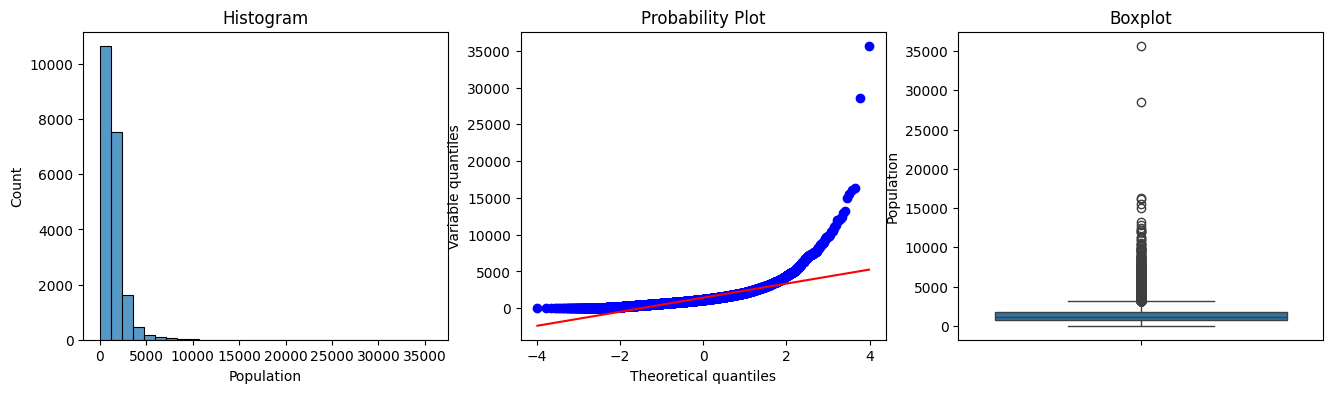

In [ ]:
# memvisualisasikan outlier di MedInc sebelum Trimmed
check_plot(df_california.copy(), 'Population')

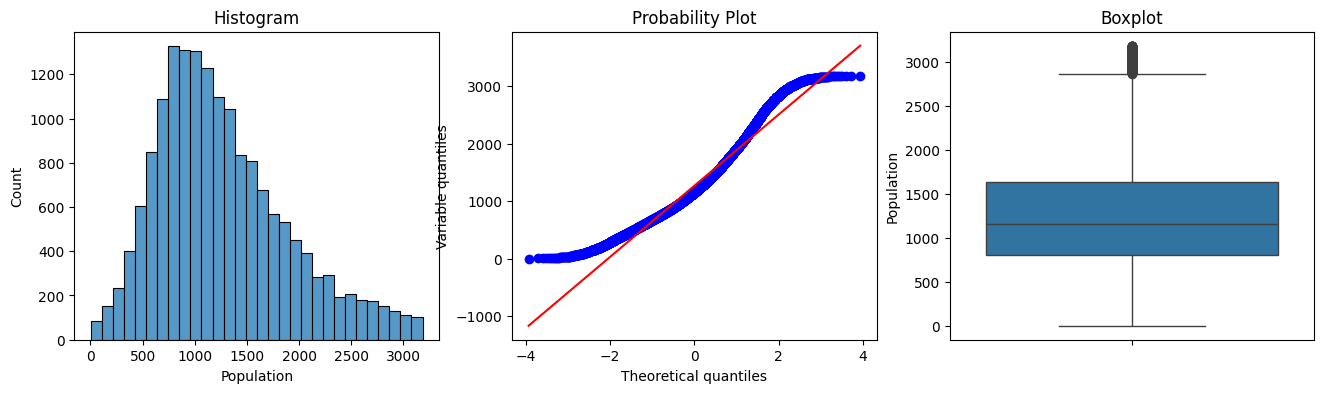

In [ ]:
# memvisualisasikan outlier di MedInc sesudah Trimmed
check_plot(clfr_trimmed, 'Population')

> **Kolom 'AveOccup**


---



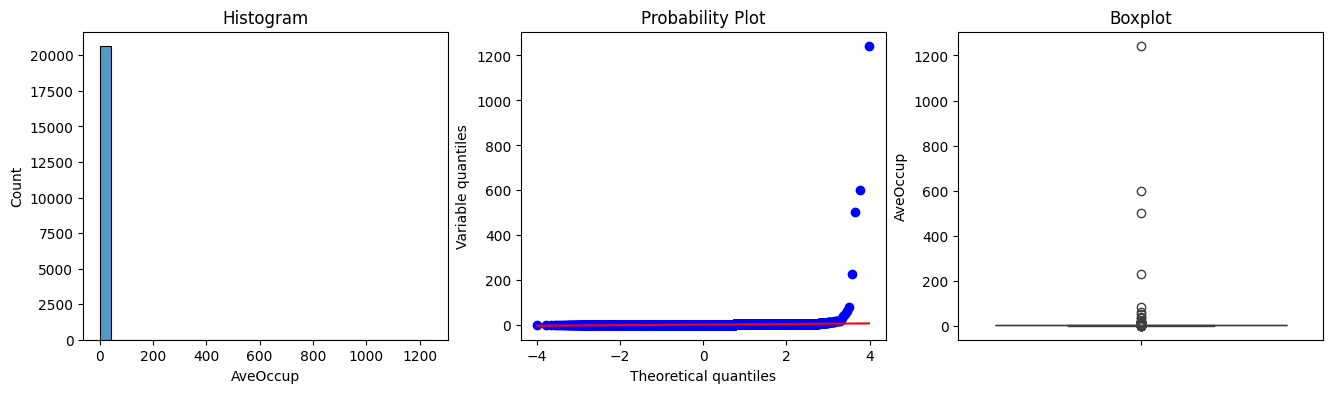

In [ ]:
# memvisualisasikan outlier di MedInc sebelum Trimmed
check_plot(df_california.copy(), 'AveOccup')

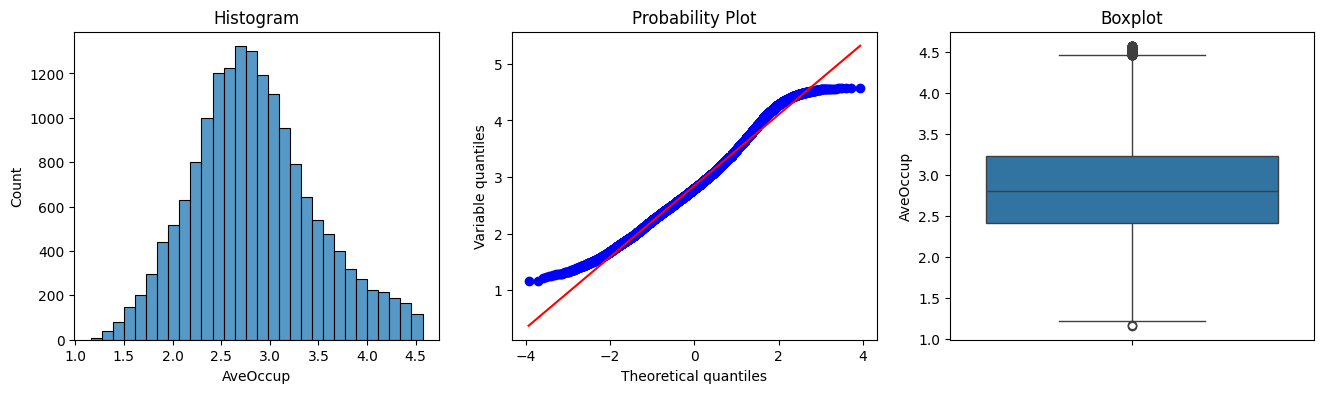

In [ ]:
# memvisualisasikan outlier di MedInc sesudah Trimmed
check_plot(clfr_trimmed, 'AveOccup')

### Assignment 1.b
1. Lakukan handling outlier pilih 1 kolom saja yang di handling dengan IQR setelah mengecek distribusinya
2. Dan cek distribusinya kembali
3. untuk tujuan machine learning dan juga exploratory data analysis.

In [ ]:
### untuk tujuan machine learning### Assignment 1.b Lakukan handling outlier pilih 1 kolom saja yang di handling dengan IQR setelah mengecek distribusinya
### Dan cek distribusinya kembali


### untuk tujuan machine learning

In [ ]:
from sklearn.model_selection import train_test_split
# splitting terlebih dahulu (angka 42 anjuran dari buku yang di baca ka kurnia)
train_clfr_1data, test_clfr_1data = train_test_split(df_california, test_size = 0.2, train_size=0.8, random_state=42)

#NOTES :
#train : test = 80:20 atau 75:25 atau (minimum :70:30 atau maksimum: 90:10) bagi angka yg lain (85:15)
#data train di-handling outliernya
#tapi tidak untuk data test, karena data test ibarat representasi data masa depan yang digunakan untuk melihat performa Machine Learning

In [ ]:
# copy data for backup
train_clfr_1data = train_clfr_1data.copy()

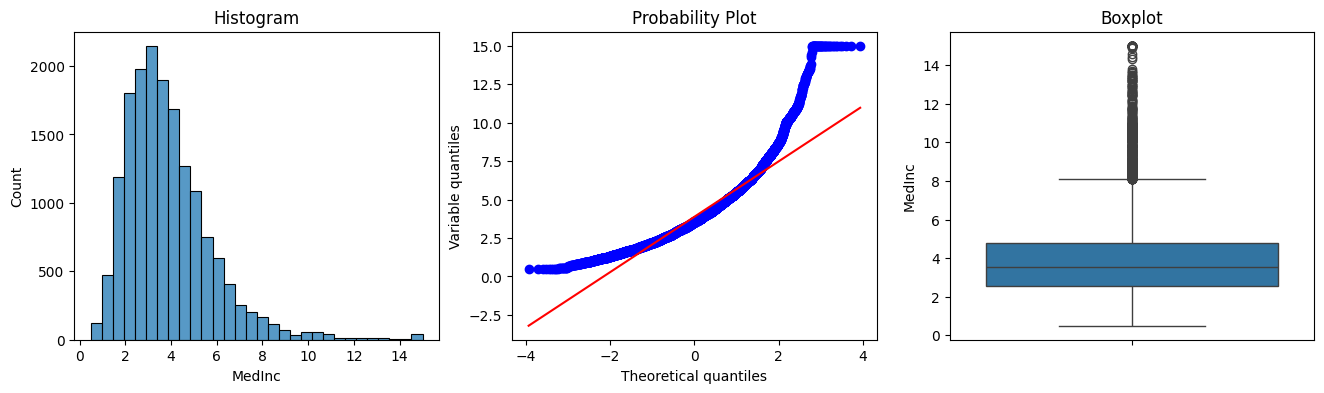

In [ ]:
# memvisualisasikan outlier di MedInc Sebelum Trimmed
check_plot(train_clfr_1data.copy(), 'MedInc')

In [ ]:
train_clfr_1data.shape #data sebelum di Handling

(16512, 9)

In [ ]:
# Melakukan loop untuk mengecek distribusi tiap kolom
def find_outlier_boundary(df, variable):

    # Mari kita hitung batas luar yang merupakan outlier

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [ ]:
# batas untuk MedInc

MedInc_upper_limit, MedInc_lower_limit = find_outlier_boundary(train_clfr_1data, 'MedInc')
MedInc_upper_limit, MedInc_lower_limit

(np.float64(8.0828875), np.float64(-0.7430125000000003))

In [ ]:
# Trimming atau drop value outlier -> pengurangan baris
# Trimming outliers from the training data
train_clfr_1data = train_clfr_1data[(train_clfr_1data['MedInc'] <= MedInc_upper_limit) & (train_clfr_1data['MedInc'] >= MedInc_lower_limit)]

In [ ]:
train_clfr_1data.shape #data sesudah di handling

(15983, 9)

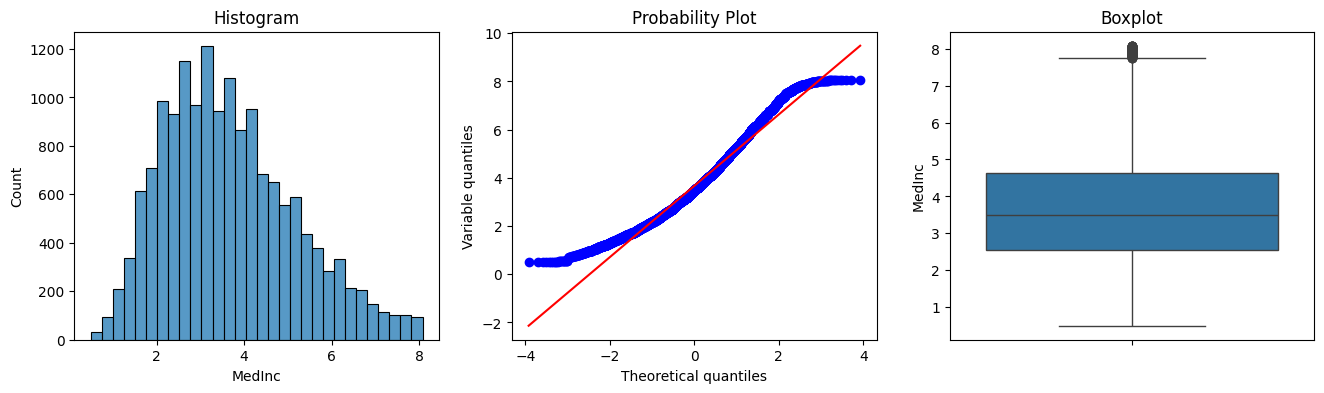

In [ ]:
# memvisualisasikan outlier di MedInc Sesudah Trimmed
check_plot(train_clfr_1data, 'MedInc')

### untuk exploratory data analysis

In [ ]:
# copy data for backup
data_clfr_1data = df_california.copy()

In [ ]:
df_california.copy().shape #data sesudah di handling

(20640, 9)

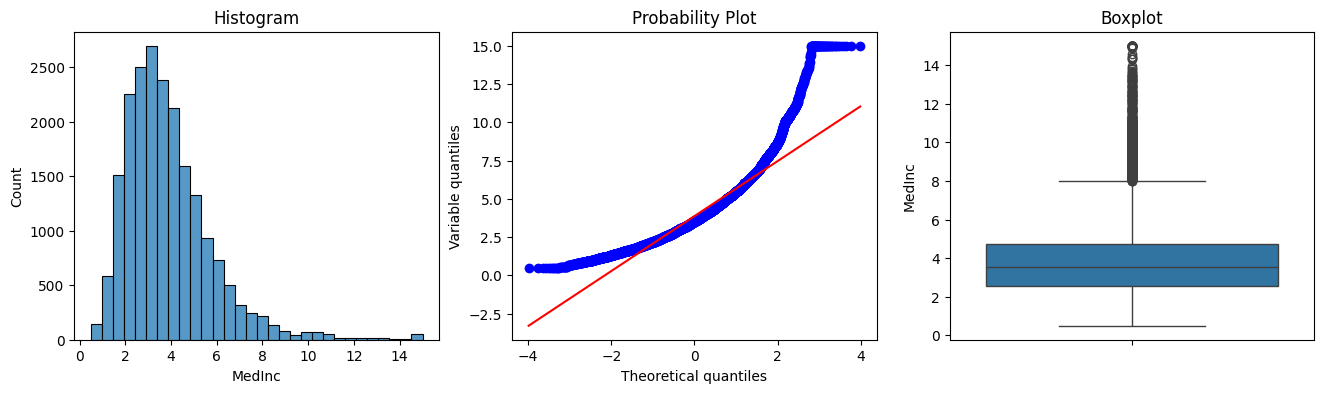

In [ ]:
# memvisualisasikan outlier di AveOccup
check_plot(data_clfr_1data.copy(), 'MedInc')

In [ ]:
# batas atas dan batas bawah untuk AveOccup
full_MedInc_upper_limit, full_MedInc_lower_limit = find_outlier_boundary(data_clfr_1data, 'MedInc')
full_MedInc_upper_limit, full_MedInc_lower_limit

(np.float64(8.013024999999999), np.float64(-0.7063750000000004))

In [ ]:
# Trimming atau drop value outlier -> pengurangan baris
# Trimming outliers from the training data
data_clfr_1data = data_clfr_1data[(data_clfr_1data['MedInc'] <= full_MedInc_upper_limit) & (data_clfr_1data['MedInc'] >= full_MedInc_lower_limit)]

In [ ]:
data_clfr_1data.shape #data sesudah di handling

(19959, 9)

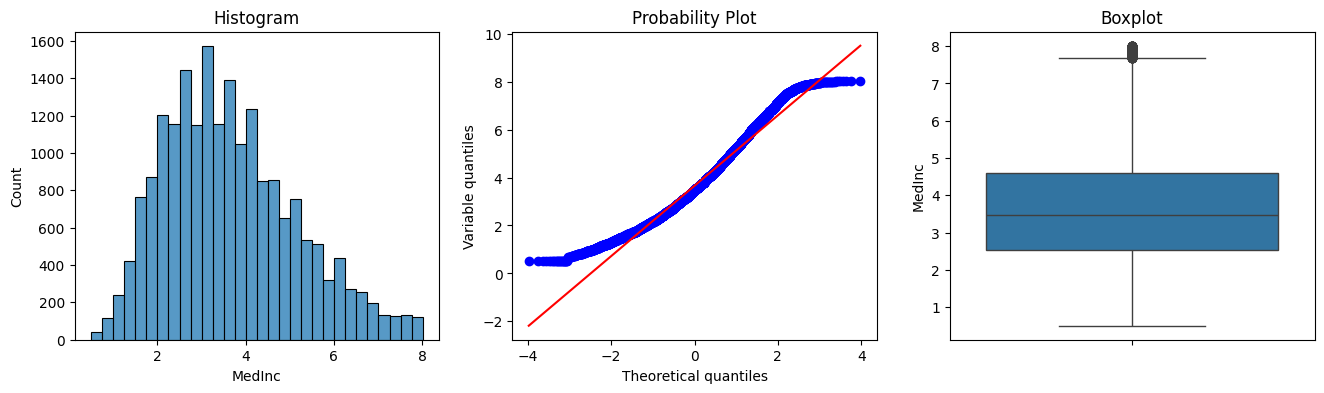

In [ ]:
# memvisualisasikan outlier di AveOccup
check_plot(data_clfr_1data, 'MedInc')

# C. Missing Value Handling
Missing Value Merupakan nilai yang hilang di suatu kolom, namun tidak hanya sebatas itu. Untuk nilai yang tidak sesuai tapi muncul didalam suatu kolom tertentu juga bisa dianggap sebagai missing value. Misal tipenya kategorikal tapi isinya ada yang berupa angka dan juga sebaliknya.

In [ ]:
df_company = pd.read_csv('/content/drive/MyDrive/company.csv')

df_company = df_company.copy()

### Aturan missing value handling :
1. jika tipe datanya itu **numerik** -> handling menggunakan **median** (robust / tahan terhadap outlier)
2. jika tipe datanya itu **kategorik / object / string** -> handling menggunakan **mode / modus**

In [ ]:
from sklearn.model_selection import train_test_split
#Splitting terlebih dahulu
train_company, test_company = train_test_split(df_company, test_size = 0.2, train_size=0.8, random_state=42)
#train : test = 80:20 atau 75:25 atau (minimum :70:30 atau maksimum: 90:10) bagi angka yg lain (85:15)

In [ ]:
train_company.head()

,Revenue,Size,Rating,Headquarters
480,$100 to $500 million (USD),201 to 500 employees,4.7,"Annapolis Junction, MD"
605,Less than $1 million (USD),1 to 50 employees,4.0,"Plainsboro, NJ"
61,$100 to $500 million (USD),201 to 500 employees,4.5,"Woburn, MA"
145,$100 to $500 million (USD),501 to 1000 employees,NaN,"Bethesda, MD"
353,Unknown / Non-Applicable,1 to 50 employees,NaN,"Cambridge, MA"


## Assignment 2. Missing Value Handling :
1. Cek persentase missing value hanya pada kolom Headquarters di company.csv, Cek jenis missing valuenya apakah ada atau tidak ?
2. apakah di drop atau tidak (gunakan syarat drop kolom jika > 20%)
3. jika tidak maka handling, dan dengan cara apa handling nilainya, median atau modus ?
4. Lakukan untuk tujuan machine learning dan juga exploratory data analysis.

### untuk tujuan machine learning

In [ ]:
df_company.isna().sum()

,0
Revenue,0
Size,0
Rating,50
Headquarters,0


In [ ]:
df_company.isnull().sum()

,0
Revenue,0
Size,0
Rating,50
Headquarters,0


In [ ]:
df_company[df_company.isna().any(axis=1)]

,Revenue,Size,Rating,Headquarters
0,Unknown / Non-Applicable,1001 to 5000 employees,NaN,"New York, NY"
7,$1 to $2 billion (USD),1001 to 5000 employees,NaN,"Bedford, MA"
82,$25 to $50 million (USD),51 to 200 employees,NaN,"Minneapolis, MN"
84,$25 to $50 million (USD),51 to 200 employees,NaN,"Austin, TX"
92,$1 to $2 billion (USD),5001 to 10000 employees,NaN,"Herndon, VA"
108,Unknown / Non-Applicable,10000+ employees,NaN,"Palo Alto, CA"
116,$5 to $10 million (USD),51 to 200 employees,NaN,"Annapolis Junction, MD"
129,$2 to $5 billion (USD),5001 to 10000 employees,NaN,"Sunnyvale, CA"
134,Unknown / Non-Applicable,51 to 200 employees,NaN,"San Francisco, CA"
136,$50 to $100 million (USD),201 to 500 employees,NaN,"Lehi, UT"


In [ ]:
#Tulis jawaban missing value handling kolom Headquarters disini
for column in df_company.columns:
    print(f"============= {column} =================")
    display(df_company[column].value_counts())
    print()

============= Revenue =================


,count
Revenue,
Unknown / Non-Applicable,213
$100 to $500 million (USD),94
$10+ billion (USD),63
$2 to $5 billion (USD),45
$10 to $25 million (USD),41
$1 to $2 billion (USD),36
$25 to $50 million (USD),36
$50 to $100 million (USD),31
$1 to $5 million (USD),31



============= Size =================


,count
Size,
51 to 200 employees,135
1001 to 5000 employees,104
1 to 50 employees,86
201 to 500 employees,85
10000+ employees,80
501 to 1000 employees,77
5001 to 10000 employees,61
-1,27
Unknown,17



============= Rating =================


,count
Rating,
3.5,52
-1.0,43
3.3,39
3.9,39
4.0,38
3.7,37
3.8,35
5.0,34
4.5,31



============= Headquarters =================


,count
Headquarters,
"New York, NY",33
"San Francisco, CA",31
-1,31
"Chicago, IL",23
"Boston, MA",19
"Reston, VA",14
"Mc Lean, VA",13
"Westminster, CO",12
"Cambridge, MA",10


> Kolom Headquarters terdapat missing value yaitu -1 sebanyak 31 data

In [ ]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Revenue       672 non-null    object 
 1   Size          672 non-null    object 
 2   Rating        622 non-null    float64
 3   Headquarters  672 non-null    object 
dtypes: float64(1), object(3)
memory usage: 21.1+ KB


In [ ]:
# Menghitung persentase nilai -1 di kolom Headquarters
100 * len(df_company[df_company['Headquarters'].isin(['-1'])]) / len(df_company)

4.613095238095238

> persentase missing value dari kolom Headquarters sebanyak 4,6% sehingga tidak dilakukan drop Missing value namun kita handling

In [ ]:
#Mode imputation Untuk Headquarters
train_mode_Headquarters = train_company[~train_company['Headquarters'].isin(['-1'])]['Headquarters'].mode()[0]
train_mode_Headquarters

'New York, NY'

> kita handling dengan mengganti -1 menjadi Newyork Ny karena data tersebut adalah modus dari kolom Headquarters

In [ ]:
#implement missing value imputation to train and test, from Headquarters mode value in train data
train_company['Headquarters'] = train_company['Headquarters'].apply(lambda x: train_mode_Headquarters if x in ['-1'] else x)
test_company['Headquarters'] = test_company['Headquarters'].apply(lambda x: train_mode_Headquarters if x in ['-1'] else x)

In [ ]:
train_company.isna().sum()

,0
Revenue,0
Size,0
Rating,41
Headquarters,0


In [ ]:
test_company.isna().sum()

,0
Revenue,0
Size,0
Rating,9
Headquarters,0


In [ ]:
#Tulis jawaban missing value handling kolom Headquarters disini
for column in train_company.columns:
    print(f"============= {column} =================")
    display(train_company[column].value_counts())
    print()

============= Revenue =================


,count
Revenue,
Unknown / Non-Applicable,178
$100 to $500 million (USD),75
$10+ billion (USD),46
$2 to $5 billion (USD),35
$1 to $2 billion (USD),30
$10 to $25 million (USD),30
$25 to $50 million (USD),27
$1 to $5 million (USD),27
$50 to $100 million (USD),23



============= Size =================


,count
Size,
51 to 200 employees,102
1001 to 5000 employees,83
1 to 50 employees,76
501 to 1000 employees,67
201 to 500 employees,65
10000+ employees,57
5001 to 10000 employees,50
-1,20
Unknown,17



============= Rating =================


,count
Rating,
3.5,42
-1.0,35
3.9,33
3.3,33
4.0,31
5.0,29
3.8,28
3.7,27
4.5,25



============= Headquarters =================


,count
Headquarters,
"New York, NY",53
"San Francisco, CA",28
"Chicago, IL",20
"Boston, MA",13
"Mc Lean, VA",12
"Westminster, CO",10
"Reston, VA",9
"Cambridge, United Kingdom",8
"Cambridge, MA",8


In [ ]:
#Tulis jawaban missing value handling kolom Headquarters disini
for column in test_company.columns:
    print(f"============= {column} =================")
    display(test_company[column].value_counts())
    print()

============= Revenue =================


,count
Revenue,
Unknown / Non-Applicable,35
$100 to $500 million (USD),19
$10+ billion (USD),17
$10 to $25 million (USD),11
$2 to $5 billion (USD),10
$25 to $50 million (USD),9
$50 to $100 million (USD),8
-1,7
$1 to $2 billion (USD),6



============= Size =================


,count
Size,
51 to 200 employees,33
10000+ employees,23
1001 to 5000 employees,21
201 to 500 employees,20
5001 to 10000 employees,11
1 to 50 employees,10
501 to 1000 employees,10
-1,7



============= Rating =================


,count
Rating,
3.7,10
3.5,10
3.4,8
-1.0,8
4.2,8
4.0,7
3.8,7
3.9,6
3.6,6



============= Headquarters =================


,count
Headquarters,
"New York, NY",11
"Boston, MA",6
"Reston, VA",5
"Basel, Switzerland",4
"San Francisco, CA",3
"Chicago, IL",3
"Westminster, CO",2
"Denver, CO",2
"Alexandria, VA",2


> hasil akhirnya setelah kita handling sudah tidak ada missing value di data headquarters

### untuk exploratory data analysis

In [ ]:
#Tulis jawaban missing value handling kolom Headquarters disini


In [ ]:
df_company.head()

,Revenue,Size,Rating,Headquarters
0,Unknown / Non-Applicable,1001 to 5000 employees,NaN,"New York, NY"
1,$1 to $2 billion (USD),5001 to 10000 employees,4.2,"Herndon, VA"
2,$100 to $500 million (USD),1001 to 5000 employees,3.8,"Boston, MA"
3,$100 to $500 million (USD),501 to 1000 employees,3.5,"Bad Ragaz, Switzerland"
4,Unknown / Non-Applicable,51 to 200 employees,2.9,"New York, NY"


In [ ]:
df_company.isna().sum()

,0
Revenue,0
Size,0
Rating,50
Headquarters,0


In [ ]:
df_company.isnull().sum()

,0
Revenue,0
Size,0
Rating,50
Headquarters,0


In [ ]:
df_company[df_company.isna().any(axis=1)]

,Revenue,Size,Rating,Headquarters
0,Unknown / Non-Applicable,1001 to 5000 employees,NaN,"New York, NY"
7,$1 to $2 billion (USD),1001 to 5000 employees,NaN,"Bedford, MA"
82,$25 to $50 million (USD),51 to 200 employees,NaN,"Minneapolis, MN"
84,$25 to $50 million (USD),51 to 200 employees,NaN,"Austin, TX"
92,$1 to $2 billion (USD),5001 to 10000 employees,NaN,"Herndon, VA"
108,Unknown / Non-Applicable,10000+ employees,NaN,"Palo Alto, CA"
116,$5 to $10 million (USD),51 to 200 employees,NaN,"Annapolis Junction, MD"
129,$2 to $5 billion (USD),5001 to 10000 employees,NaN,"Sunnyvale, CA"
134,Unknown / Non-Applicable,51 to 200 employees,NaN,"San Francisco, CA"
136,$50 to $100 million (USD),201 to 500 employees,NaN,"Lehi, UT"


In [ ]:
#untuk mengetahui missing value bukan Nan, None, np.nan tapi tipe object atau str
for column in df_company.columns:
    print(f"============= {column} =================")
    display(df_company[column].value_counts())
    print()

============= Revenue =================


,count
Revenue,
Unknown / Non-Applicable,213
$100 to $500 million (USD),94
$10+ billion (USD),63
$2 to $5 billion (USD),45
$10 to $25 million (USD),41
$1 to $2 billion (USD),36
$25 to $50 million (USD),36
$50 to $100 million (USD),31
$1 to $5 million (USD),31



============= Size =================


,count
Size,
51 to 200 employees,135
1001 to 5000 employees,104
1 to 50 employees,86
201 to 500 employees,85
10000+ employees,80
501 to 1000 employees,77
5001 to 10000 employees,61
-1,27
Unknown,17



============= Rating =================


,count
Rating,
3.5,52
-1.0,43
3.3,39
3.9,39
4.0,38
3.7,37
3.8,35
5.0,34
4.5,31



============= Headquarters =================


,count
Headquarters,
"New York, NY",33
"San Francisco, CA",31
-1,31
"Chicago, IL",23
"Boston, MA",19
"Reston, VA",14
"Mc Lean, VA",13
"Westminster, CO",12
"Cambridge, MA",10


In [ ]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Revenue       672 non-null    object 
 1   Size          672 non-null    object 
 2   Rating        622 non-null    float64
 3   Headquarters  672 non-null    object 
dtypes: float64(1), object(3)
memory usage: 21.1+ KB


In [ ]:
# Menghitung persentase nilai -1 di kolom Headquarters
100 * len(df_company[df_company['Headquarters'].isin(['-1'])]) / len(df_company)


4.613095238095238

In [ ]:
#Mode imputation Untuk Headquarters
mode_Headquarters = df_company[~df_company['Headquarters'].isin(['-1'])]['Headquarters'].mode()[0]
mode_Headquarters

'New York, NY'

In [ ]:
#implement missing value imputation to train and test, from size mode value in train data
df_company['Headquarters'] = df_company['Headquarters'].apply(lambda x: mode_Headquarters if x in ['-1'] else x)

In [ ]:
df_company.isna().sum()

,0
Revenue,0
Size,0
Rating,50
Headquarters,0


In [ ]:
#Tulis jawaban missing value handling kolom Headquarters disini #sebelum dilakukan handlig missing value
for column in df_company.copy().columns:
    print(f"============= {column} =================")
    display(df_company.copy()[column].value_counts())
    print()

============= Revenue =================


,count
Revenue,
Unknown / Non-Applicable,213
$100 to $500 million (USD),94
$10+ billion (USD),63
$2 to $5 billion (USD),45
$10 to $25 million (USD),41
$1 to $2 billion (USD),36
$25 to $50 million (USD),36
$50 to $100 million (USD),31
$1 to $5 million (USD),31



============= Size =================


,count
Size,
51 to 200 employees,135
1001 to 5000 employees,104
1 to 50 employees,86
201 to 500 employees,85
10000+ employees,80
501 to 1000 employees,77
5001 to 10000 employees,61
-1,27
Unknown,17



============= Rating =================


,count
Rating,
3.5,52
-1.0,43
3.3,39
3.9,39
4.0,38
3.7,37
3.8,35
5.0,34
4.5,31



============= Headquarters =================


,count
Headquarters,
"New York, NY",64
"San Francisco, CA",31
"Chicago, IL",23
"Boston, MA",19
"Reston, VA",14
"Mc Lean, VA",13
"Westminster, CO",12
"Cambridge, MA",10
"Cambridge, United Kingdom",10


In [ ]:
#Tulis jawaban missing value handling kolom Headquarters disini #sesudah dilakukan handling missing value
for column in df_company.columns:
    print(f"============= {column} =================")
    display(df_company[column].value_counts())
    print()

============= Revenue =================


,count
Revenue,
Unknown / Non-Applicable,213
$100 to $500 million (USD),94
$10+ billion (USD),63
$2 to $5 billion (USD),45
$10 to $25 million (USD),41
$1 to $2 billion (USD),36
$25 to $50 million (USD),36
$50 to $100 million (USD),31
$1 to $5 million (USD),31



============= Size =================


,count
Size,
51 to 200 employees,135
1001 to 5000 employees,104
1 to 50 employees,86
201 to 500 employees,85
10000+ employees,80
501 to 1000 employees,77
5001 to 10000 employees,61
-1,27
Unknown,17



============= Rating =================


,count
Rating,
3.5,52
-1.0,43
3.3,39
3.9,39
4.0,38
3.7,37
3.8,35
5.0,34
4.5,31



============= Headquarters =================


,count
Headquarters,
"New York, NY",64
"San Francisco, CA",31
"Chicago, IL",23
"Boston, MA",19
"Reston, VA",14
"Mc Lean, VA",13
"Westminster, CO",12
"Cambridge, MA",10
"Cambridge, United Kingdom",10


#### Tidak ada missing value lagi, dan data tersebut siap untuk digunakan pada Exploratory Data Analysis

# D. Encoding
Definisi : Mengubah tipe kategorikal menjadi numerikal dengan pendekatan aturan encoding untuk persiapan sebelum dilakukannya machine learning modelling. Teknik Encoding yang umum dipakai :
1. One Hot Encoding (OHE) : Lakukan pada kolom gender
2. Label Encoding / Ordinal Encoding : Lakukan pada kolom Yes dan No, Jika Yes menjadi 1 , Jika No menjadi 0. Sebagai Contohnya di kolom  Partner, Dependents.
3. Mean Encoding : Contract

In [ ]:
df_churn = pd.read_csv('/content/drive/MyDrive/Telco-Customer-Churn.csv')

df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#Cek nilai-nilai di kolom kategorikal
custom_columns = ['gender','Partner','Dependents','PhoneService','MultipleLines',
                  'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection'
                  ,'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
for column in custom_columns:
    print(f"============= {column} =================")
    display(df_churn[column].value_counts())
    print()

============= gender =================


,count
gender,
Male,3555
Female,3488



============= Partner =================


,count
Partner,
No,3641
Yes,3402



============= Dependents =================


,count
Dependents,
No,4933
Yes,2110



============= PhoneService =================


,count
PhoneService,
Yes,6361
No,682



============= MultipleLines =================


,count
MultipleLines,
No,3390
Yes,2971
No phone service,682



============= InternetService =================


,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526



============= OnlineSecurity =================


,count
OnlineSecurity,
No,3498
Yes,2019
No internet service,1526



============= OnlineBackup =================


,count
OnlineBackup,
No,3088
Yes,2429
No internet service,1526



============= DeviceProtection =================


,count
DeviceProtection,
No,3095
Yes,2422
No internet service,1526



============= TechSupport =================


,count
TechSupport,
No,3473
Yes,2044
No internet service,1526



============= StreamingTV =================


,count
StreamingTV,
No,2810
Yes,2707
No internet service,1526



============= StreamingMovies =================


,count
StreamingMovies,
No,2785
Yes,2732
No internet service,1526



============= Contract =================


,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473



============= PaperlessBilling =================


,count
PaperlessBilling,
Yes,4171
No,2872



============= PaymentMethod =================


,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522



============= Churn =================


,count
Churn,
No,5174
Yes,1869


In [ ]:
#Lakukan normalisasi nilai terlebih dahulu
df_churn['StreamingMovies'] = df_churn['StreamingMovies'].replace({'No internet service':'No'})
df_churn['StreamingTV'] = df_churn['StreamingTV'].replace({'No internet service':'No'})
df_churn['TechSupport'] = df_churn['TechSupport'].replace({'No internet service':'No'})
df_churn['DeviceProtection'] = df_churn['DeviceProtection'].replace({'No internet service':'No'})
df_churn['OnlineBackup'] = df_churn['OnlineBackup'].replace({'No internet service':'No'})
df_churn['OnlineSecurity'] = df_churn['OnlineSecurity'].replace({'No internet service':'No'})
df_churn['MultipleLines'] = df_churn['MultipleLines'].replace({'No phone service':'No'})

In [ ]:
#Cek nilai-nilai di kolom kategorikal
for column in custom_columns:
    print(f"============= {column} =================")
    display(df_churn[column].value_counts())
    print()

============= gender =================


,count
gender,
Male,3555
Female,3488



============= Partner =================


,count
Partner,
No,3641
Yes,3402



============= Dependents =================


,count
Dependents,
No,4933
Yes,2110



============= PhoneService =================


,count
PhoneService,
Yes,6361
No,682



============= MultipleLines =================


,count
MultipleLines,
No,4072
Yes,2971



============= InternetService =================


,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526



============= OnlineSecurity =================


,count
OnlineSecurity,
No,5024
Yes,2019



============= OnlineBackup =================


,count
OnlineBackup,
No,4614
Yes,2429



============= DeviceProtection =================


,count
DeviceProtection,
No,4621
Yes,2422



============= TechSupport =================


,count
TechSupport,
No,4999
Yes,2044



============= StreamingTV =================


,count
StreamingTV,
No,4336
Yes,2707



============= StreamingMovies =================


,count
StreamingMovies,
No,4311
Yes,2732



============= Contract =================


,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473



============= PaperlessBilling =================


,count
PaperlessBilling,
Yes,4171
No,2872



============= PaymentMethod =================


,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522



============= Churn =================


,count
Churn,
No,5174
Yes,1869


**One Hot Encoding (OHE) : Lakukan pada kolom gender**



*   **Untuk tujuan Machine Learning**



In [ ]:
#Splitting terlebih dahulu
train_churn, test_churn = train_test_split(df_churn, test_size = 0.2, train_size=0.8, random_state = 42)

In [ ]:
# Melakukan one-hot encoding pada kolom "gender"
# Kolom-kolom yang ingin di one-hot encoding
encode_ohe = ['gender'] #buat list nama-nama kolom yang ingin dilakukan OHE
train_churn = pd.get_dummies(train_churn, columns=encode_ohe)
test_churn = pd.get_dummies(test_churn, columns=encode_ohe)

In [ ]:
train_churn.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
2142,4223-BKEOR,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No,True,False
1623,6035-RIIOM,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No,True,False
6074,3797-VTIDR,0,Yes,No,1,No,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes,False,True
1362,2568-BRGYX,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes,False,True
6754,2775-SEFEE,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No,False,True


In [ ]:
test_churn.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
185,1024-GUALD,0,Yes,No,1,No,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes,True,False
2715,0484-JPBRU,0,No,No,41,Yes,Yes,No,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No,False,True
3825,3620-EHIMZ,0,Yes,Yes,52,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.35,1031.7,No,True,False
1807,6910-HADCM,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes,True,False
132,8587-XYZSF,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.1,No,False,True


* **Untuk Exploratory Data Analysis (EDA)**

In [ ]:
# Copy data for backup
data_churn = df_churn.copy()

In [ ]:
encode_ohe = ['gender'] #buat list nama-nama kolom yang ingin dilakukan OHE
data_churn = pd.get_dummies(data_churn, columns=encode_ohe)

In [ ]:
data_churn.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
0,7590-VHVEG,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,True,False
1,5575-GNVDE,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,False,True
2,3668-QPYBK,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,False,True
3,7795-CFOCW,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,False,True
4,9237-HQITU,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,True,False


## Assignment 3.a Label Encoder :

0. Lakukan label encoder pada 'Partner', 'Dependents' juga sama seperti yang telah dibahas dikelas, **lalu anda wajib melakukan** :
1. Pilih kolom-kolom yang terindikasi bersifat Data Ordinal.
2. Ganti nilai yang tidak sesuai : No internet service menjadi No lalu validasi dengan value_counts
3. Kemudian lakukan label Encoder
4. Lakukan untuk tujuan machine learning dan juga exploratory data analysis.
5. Notes : gunakan Telco-Customer-Churn.csv

In [ ]:
#Tulis jawaban
from sklearn.preprocessing import LabelEncoder


### untuk tujuan machine learning

In [ ]:
#Splitting terlebih dahulu
train_churn, test_churn = train_test_split(df_churn, test_size = 0.2, train_size=0.8, random_state=42)

In [ ]:
# Kolom-kolom yang ingin di-label encode
columns_to_encode = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
for col in columns_to_encode:
  print(col)

Partner
Dependents
PhoneService
MultipleLines
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
PaperlessBilling
Churn


In [ ]:
# Menerapkan label encoding ke data pelatihan (train)
for col in columns_to_encode:
    train_churn[col] = label_encoder.fit_transform(train_churn[col])
#fit dilakukan di data train dan implementasikan ke train, kemudian lakukan transform ke data test. Untuk mencegah data leakage

In [ ]:
# Menerapkan label encoding yang sama ke data uji (test)
for col in columns_to_encode:
    test_churn[col] = label_encoder.transform(test_churn[col])

In [ ]:
train_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2142,4223-BKEOR,Female,0,0,1,21,1,0,DSL,1,0,1,0,0,1,One year,0,Mailed check,64.85,1336.8,0
1623,6035-RIIOM,Female,0,0,0,54,1,1,Fiber optic,0,1,0,0,1,1,Two year,1,Bank transfer (automatic),97.20,5129.45,0
6074,3797-VTIDR,Male,0,1,0,1,0,0,DSL,0,0,0,0,0,0,Month-to-month,1,Electronic check,23.45,23.45,1
1362,2568-BRGYX,Male,0,0,0,4,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.20,237.95,1
6754,2775-SEFEE,Male,0,0,1,0,1,1,DSL,1,1,0,1,0,0,Two year,1,Bank transfer (automatic),61.90,,0


In [ ]:
test_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,1,0,1,0,0,DSL,0,0,0,0,0,0,Month-to-month,1,Electronic check,24.80,24.8,1
2715,0484-JPBRU,Male,0,0,0,41,1,1,No,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),25.25,996.45,0
3825,3620-EHIMZ,Female,0,1,1,52,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,19.35,1031.7,0
1807,6910-HADCM,Female,0,0,0,1,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,0,Electronic check,76.35,76.35,1
132,8587-XYZSF,Male,0,0,0,67,1,0,DSL,0,0,0,1,0,0,Two year,0,Bank transfer (automatic),50.55,3260.1,0


### untuk exploratory data analysis

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Kolom-kolom yang ingin di-label encode
columns_to_encode = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

# Inisialisasi LabelEncoder
labelEncoder = LabelEncoder()

In [ ]:
# Menerapkan label encoding ke data full
for col in columns_to_encode:
    data_churn[col] = labelEncoder.fit_transform(data_churn[col])
#fit dilakukan di data train dan implementasikan ke train, kemudian lakukan transform ke data test. Untuk mencegah data leakage

In [ ]:
data_churn.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
0,7590-VHVEG,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,True,False
1,5575-GNVDE,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0,False,True
2,3668-QPYBK,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,False,True
3,7795-CFOCW,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,False,True
4,9237-HQITU,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,True,False


## 3.b Assignment Mean Encoding
1. Lakukan kolom Mean Encoding pada InternetService

In [ ]:
# Tulis jawaban


### untuk tujuan machine learning

In [ ]:
#Splitting terlebih dahulu
train_churn, test_churn = train_test_split(data_churn, test_size = 0.2, train_size=0.8, random_state=42)

In [ ]:
# kita lakukan hal yang sama dengan menaruh informasi perhitungannya dalam dictionary
# kita ambil nilainya dari data train saja
# kemudian kita aplikasikan ke kolom cabin pada data train dan juga ke data test menggunakan dict_contract
dict_contract = train_churn.groupby(['InternetService'])['Churn'].mean().to_dict()
dict_contract

{'DSL': 0.1918514698298092,
 'Fiber optic': 0.41555824264409513,
 'No': 0.07660626029654036}

Hasil tersebut adalah mean encoding dari kolom 'InternetService' terhadap kolom 'Churn'. Angkanya merepresentasikan persentase pelanggan yang churn (berhenti berlangganan) untuk setiap jenis layanan internet.

DSL: Sekitar 19.18% pelanggan dengan internet DSL melakukan churn.

Fiber optic: Sekitar 41.55% pelanggan dengan fiber optic melakukan churn.

No: Hanya 7.60% pelanggan yang tidak menggunakan internet yang churn.

In [ ]:
# kita ubah nilai kategorikal di data train dan test pada kolom Contract menggunakan nilai dari dict_contract
# untuk mencegah data leakage
train_churn['InternetService'] = train_churn['InternetService'].map(dict_contract)
test_churn['InternetService'] = test_churn['InternetService'].map(dict_contract)

In [ ]:
train_churn.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
2142,4223-BKEOR,0,0,1,21,1,0,0.191851,1,0,1,0,0,1,One year,0,Mailed check,64.85,1336.8,0,True,False
1623,6035-RIIOM,0,0,0,54,1,1,0.415558,0,1,0,0,1,1,Two year,1,Bank transfer (automatic),97.20,5129.45,0,True,False
6074,3797-VTIDR,0,1,0,1,0,0,0.191851,0,0,0,0,0,0,Month-to-month,1,Electronic check,23.45,23.45,1,False,True
1362,2568-BRGYX,0,0,0,4,1,0,0.415558,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.20,237.95,1,False,True
6754,2775-SEFEE,0,0,1,0,1,1,0.191851,1,1,0,1,0,0,Two year,1,Bank transfer (automatic),61.90,,0,False,True


In [ ]:
test_churn.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
185,1024-GUALD,0,1,0,1,0,0,0.191851,0,0,0,0,0,0,Month-to-month,1,Electronic check,24.80,24.8,1,True,False
2715,0484-JPBRU,0,0,0,41,1,1,0.076606,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),25.25,996.45,0,False,True
3825,3620-EHIMZ,0,1,1,52,1,0,0.076606,0,0,0,0,0,0,Two year,0,Mailed check,19.35,1031.7,0,True,False
1807,6910-HADCM,0,0,0,1,1,0,0.415558,0,0,1,0,0,0,Month-to-month,0,Electronic check,76.35,76.35,1,True,False
132,8587-XYZSF,0,0,0,67,1,0,0.191851,0,0,0,1,0,0,Two year,0,Bank transfer (automatic),50.55,3260.1,0,False,True


### untuk exploratory data analysis

In [ ]:
dict_encoding_eda_InternetService = data_churn.groupby(['InternetService'])['Churn'].mean().to_dict()
dict_encoding_eda_InternetService

{'DSL': 0.1895910780669145,
 'Fiber optic': 0.4189276485788114,
 'No': 0.07404980340760157}

Hasil tersebut adalah mean encoding dari kolom 'InternetService' terhadap kolom 'Churn'. Angkanya merepresentasikan persentase pelanggan yang churn (berhenti berlangganan) untuk setiap jenis layanan internet.

DSL: Sekitar 18.96% pelanggan dengan internet DSL melakukan churn.

Fiber optic: Sekitar 41.89% pelanggan dengan fiber optic melakukan churn.

No: Hanya 7.40% pelanggan yang tidak menggunakan internet yang churn.

In [ ]:
data_churn['InternetService'] = data_churn['InternetService'].map(dict_encoding_eda_InternetService)

In [ ]:
data_churn.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male
0,7590-VHVEG,0,1,0,1,0,0,0.189591,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,True,False
1,5575-GNVDE,0,0,0,34,1,0,0.189591,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0,False,True
2,3668-QPYBK,0,0,0,2,1,0,0.189591,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,False,True
3,7795-CFOCW,0,0,0,45,0,0,0.189591,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,False,True
4,9237-HQITU,0,0,0,2,1,0,0.418928,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,True,False


## Thank you :)